# ML-Project
#### Jiangjie Bian jb6942

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC
import seaborn as sns
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
random.seed(14299057)

In [3]:
df = pd.read_csv('musicData.csv',delimiter=',')

In [4]:
df_n = df.dropna()

In [5]:
# transform string 'key'
keys = []
for item in df_n['key']:
    if item not in keys:
        keys.append(item)
i = 1
for item in keys:
    df_n.loc[df_n["key"] == item, "key"] = i
    i+=1
# transfrom string 'mode'
keys = []
for item in df_n['mode']:
    if item not in keys:
        keys.append(item)
i = 1
for item in keys:
    df_n.loc[df_n["mode"] == item, "mode"] = i
    i+=1
# transform string 'tempo'
new_tempo = []
for i in range(0,50000):
    if df_n['tempo'].iloc[i] == '?':
        new_tempo.append(0.0)
    else:
        new_tempo.append(float(df_n['tempo'].iloc[i]))
df_n['new_tempo'] = new_tempo
df_n.drop("tempo", axis=1, inplace=True)
# drop linguistic properties
df_n.drop("instance_id", axis=1, inplace=True)
df_n.drop("artist_name", axis=1, inplace=True)
df_n.drop("track_name", axis=1, inplace=True)
df_n.drop("obtained_date", axis=1, inplace=True)
# swap music genre to the last column
col_list = list(df_n.columns)
x, y = col_list.index('music_genre'), col_list.index('new_tempo')
col_list[y], col_list[x] = col_list[x], col_list[y]
df_n = df_n[col_list]

C:\Users\bianj\AppData\Local\Temp\ipykernel_8712\471291410.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['new_tempo'] = new_tempo
C:\Users\bianj\AppData\Local\Temp\ipykernel_8712\471291410.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop("tempo", axis=1, inplace=True)
C:\Users\bianj\AppData\Local\Temp\ipykernel_8712\471291410.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [6]:
df_cluster = df_n[['popularity','acousticness','danceability','duration_ms','energy',
'instrumentalness','liveness','loudness','speechiness','valence','new_tempo']]

In [7]:
# Normalization
X_max = df_cluster.max().values
X_min = df_cluster.min().values
X_mid = (X_max + X_min) / 2
df_cluster = (df_cluster - X_mid) / (X_max - X_min)

d:\Program\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


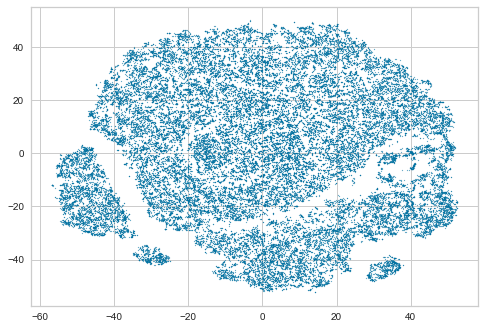

In [8]:
x_embedded = TSNE(n_components=2,perplexity=50).fit_transform(df_cluster)
plt.scatter(x_embedded[:,0],x_embedded[:,1],alpha=0.5,s=1)
plt.show()

For n_clusters = 10 The average silhouette_score is : 0.3833362


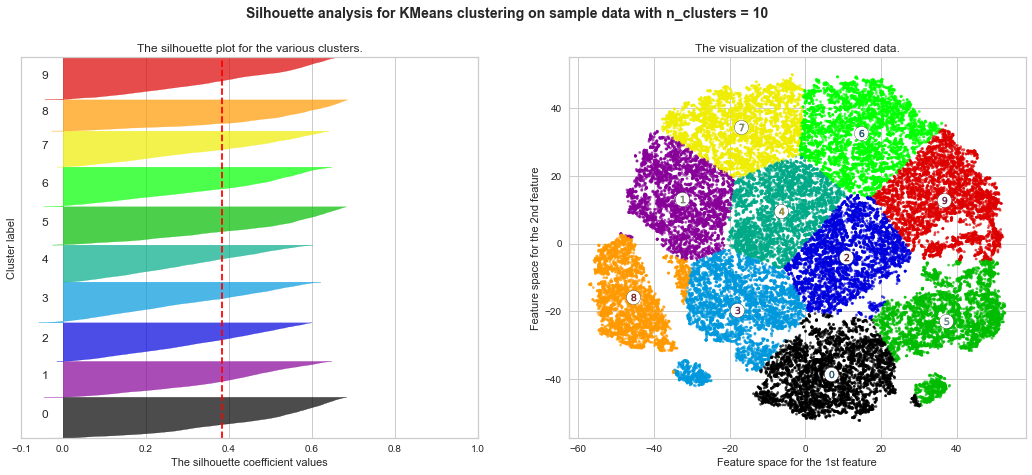

In [9]:
n_clusters = 10
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(x_embedded) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(x_embedded)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(x_embedded, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x_embedded, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    x_embedded[:, 0], x_embedded[:, 1], marker=".", 
    s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()


In [10]:
df_n['cluster'] = cluster_labels
col_list = list(df_n.columns)
x, y = col_list.index('music_genre'), col_list.index('cluster')
col_list[y], col_list[x] = col_list[x], col_list[y]
df_n = df_n[col_list]

In [11]:
# Normalization
frame = ['popularity','acousticness','danceability','duration_ms','energy',
'instrumentalness','liveness','loudness','speechiness','valence','new_tempo']
X_max = df_n[frame].max().values
X_min = df_n[frame].min().values
X_mid = (X_max + X_min) / 2
df_n[frame] = (df_n[frame] - X_mid) / (X_max - X_min)

In [12]:
# Split Train set and Test set
genres = []
train_set = pd.DataFrame()
test_set = pd.DataFrame()

for item in df_n['music_genre']:
    if item not in genres:
        genres.append(item)
for g in genres:
    new_df = pd.DataFrame()
    new_df = df_n.loc[df_n['music_genre'] == g]
    train_data, test_data = model_selection.train_test_split(new_df, 
    test_size = 500)
    frames = [train_set, train_data]
    train_set = pd.concat(frames)
    frames = [test_set, test_data]
    test_set = pd.concat(frames)

x_train = train_set.drop('music_genre', axis = 1) # We drop the target from the features.  
x_test  = test_set.drop('music_genre', axis = 1)  # Note that this does not operate inplace.
 
y_train = train_set['music_genre']

y_test  = test_set['music_genre']


Accuracy = 0.5514


d:\Program\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


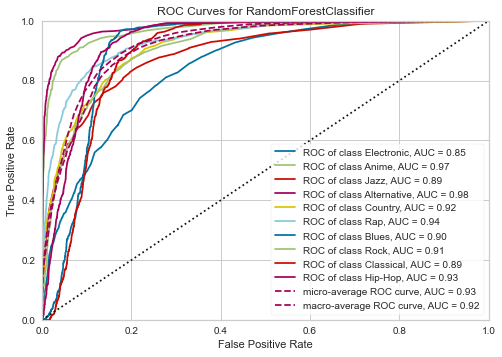

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_samples=0.5, max_features=0.5,
bootstrap=True, criterion='gini')
rf.fit(x_train, y_train)
acc = accuracy_score(y_test, rf.predict(x_test))
print("Accuracy =",acc)
visualizer = ROCAUC(rf, classes=['Electronic', 'Anime', 'Jazz', 'Alternative', 
'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'])                                   
visualizer.fit(x_train, y_train)
score = visualizer.score(x_test, y_test)
visualizer.show()

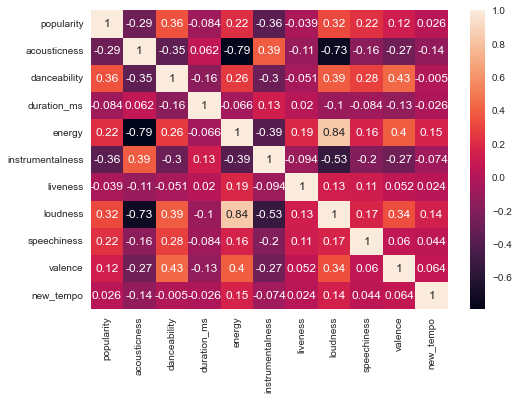

In [14]:
matrix = df_cluster.corr().round(3)
sns.heatmap(matrix,annot=True)
plt.show()